# Lab 01: Data Cleaning 
*Daniel Leskiewicz*

## Introduction
 - Within this lab, we inspect and clean a dataset from the real estate transactions within California. We are using panda dataframes and other libriaries to read in the data and visualize the data using dfferent types of plots. We also answer questions about the data that we are working with and if the plots that we generate are appropiate.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## 1. Loading the Data and Initial Assessment

#### Loading in the dataset into a pandas dataframe

In [2]:
data = pd.read_csv("Sacramentorealestatetransactions.csv")

#### Previewing the dataset and using the head() command to view a couple of rows of the dateset

In [3]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### Previewing the dataset and using the info() command to view the data types in the dataframe 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


#### With describing the data we see street names, cities which that street is located in, the zip code of the city, the amount of beds and bath, with the square footage of the place, what type of the place it is, and the price, sales date, and logitude and latitude. 

#### The inferred types are mostly for street, city, state, type, sales_date they are objects, zip, beds, baths, sq_ft, price are int64's, and latitude and logitude are float64. 

#### There are no columns that have null values. 

## 2. Representing Categorical Variables

In [5]:
streets_unique = data['street'].nunique()
zipcode_unique = data['zip'].nunique()
beds_unique = data['beds'].nunique()
print("Streets_unique " + str(streets_unique))
print("Zipcode_unique " + str(zipcode_unique))
print("beds_unique " + str(beds_unique))

Streets_unique 981
Zipcode_unique 68
beds_unique 8


#### The streets, zipcodes, beds should be represented as categorical variable. It's doesn't make any sense to have them as integers because the integer value doesn't really tell us anything.

#### Converting the variables city, state, zip, beds, and baths into categorical types.

In [6]:
data['city'] = data['city'].astype("category")

In [7]:
data['state'] = data['state'].astype("category")

In [8]:
data['zip'] = data['zip'].astype("category")

In [9]:
data['beds'] = data['beds'].astype("category")

In [10]:
data['baths'] = data['baths'].astype("category")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    category
 2   zip        985 non-null    category
 3   state      985 non-null    category
 4   beds       985 non-null    category
 5   baths      985 non-null    category
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    object  
 8   sale_date  985 non-null    object  
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 63.4+ KB


## 3. Cleaning Continuous Variable

#### Plotting the histograms of each of the square footage, latitudes, and longitudes. 

Text(0.5, 0, 'Sq ft')

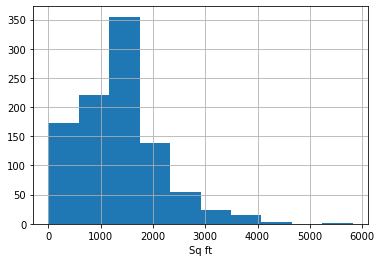

In [12]:
data['sq__ft'].hist()
plt.xlabel("Sq ft")

Text(0.5, 0, 'Latitude')

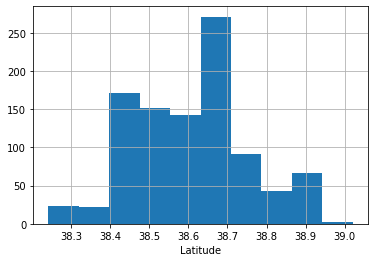

In [13]:
data['latitude'].hist()
plt.xlabel("Latitude")

Text(0.5, 0, 'Longitude')

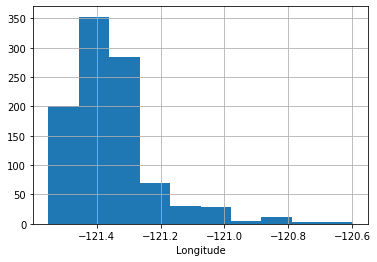

In [14]:
data['longitude'].hist()
plt.xlabel("Longitude")

#### There is an odd pattern because the square footage in that some places that are 0 square footage. These are probably because they are empty lots, so since there is no structure/building to them. These properties can be probably be garages, or parking structures.

## 4. Cleaning Categorical Variables

#### Plotting a bar graph of beds, baths, type, state, city, and zip codes.

<AxesSubplot:xlabel='beds', ylabel='count'>

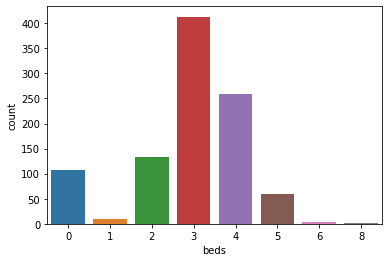

In [15]:
sns.countplot(x=data['beds'])

<AxesSubplot:xlabel='baths', ylabel='count'>

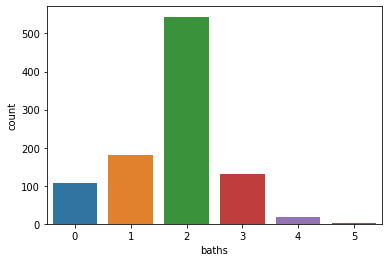

In [16]:
sns.countplot(x=data['baths'])

<AxesSubplot:xlabel='type', ylabel='count'>

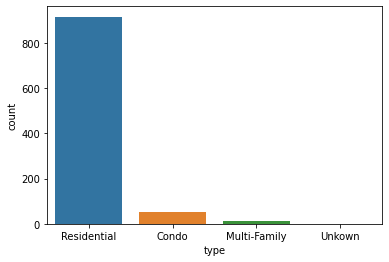

In [17]:
sns.countplot(x=data['type'])

<AxesSubplot:xlabel='state', ylabel='count'>

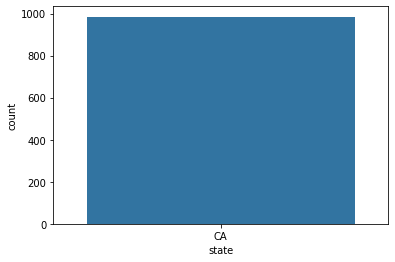

In [18]:
sns.countplot(x=data['state'])

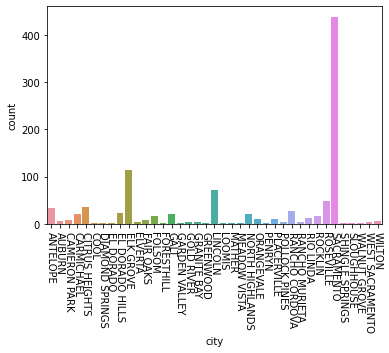

In [19]:
sns.countplot(x=data['city'])
plt.xticks(x=data['city'], rotation=-90)
plt.show()

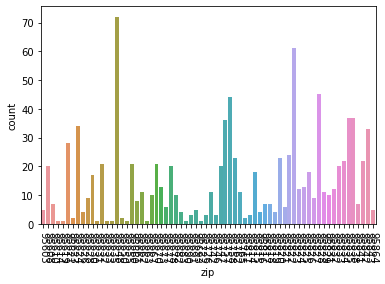

In [20]:
sns.countplot(x=data['zip'])
plt.xticks(x=data['zip'], rotation=-90)
plt.show()

#### There is something odd about these beds and baths numbers, there are larger numbers that houses that sold have 0 beds and or 0 baths. So some properties sold in this dataset  are empty lots therefore since there is a none existant building on the lot that have no beds and baths. 

#### A different explanation could be that these are not residential properties such as doctor office so they would have 0 bedrooms.

## 5. Engineering New Variables - Part 1

#### These empty lots have a square footage of 0.  Creating a new boolean variable called empty_lot so that the value is true where the square footage is 0. Otherwise like stated within the lab manual it is going to be false.

In [21]:
data['empty_lot'] = data['sq__ft'].map(lambda z: z==0)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False


<AxesSubplot:xlabel='empty_lot', ylabel='count'>

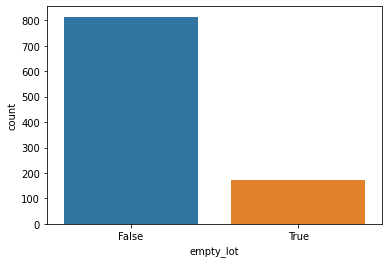

In [22]:
sns.countplot(x=data['empty_lot'])

## 6. Engineering New Variables - Part 2

In [23]:
streets_uniuqe = data['street'].nunique()
print(streets_unique)

981


#### No I don't think that this high nuimber is any sort of help for an anaylsis for a ML model in this current form. 

#### Street types (e.g., avenue, street, way) can indicate whether a road will be quiet or busy, is in a commercial or suburban area, etc.

In [24]:
data.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False


#### The last tokens in the street variable like mentioned above tells us how loud it is. We are then writing a function to get the street type that returs the type of street as a string.

In [25]:
def get_street_type(address):
    add = address.split()
    #getting the last element in the string
    type_of_street = add[-1]
    #if statement to get see if it is a unit because the last element is the number
    if add[-2] == "UNIT" or add[-2] == "unit":
        #the type of street
        type_of_street = add[-3]
    #Wish I learned some spanish but we have to parse them anyway.. looked a bit odd in the dataset
    elif add[1] == "VIA" or add[1] == "VISTA" or add[1] == "AVENDIA":
        type_of_street = add[1]
    elif add[1] == "CONEJO" or add[1] == "GRANDE" or add[1] == "HL" or add[1] == "E" or add[1] == "C" or add[1] == "LOOP" or add[-2] == "LOOP" or add[-1] == "BROADWAY" or add[-1] == "MARTINA" or add[-1] == "TRL" or add[-1] == "HL" or add[-1] == "TRAK":
        type_of_street = "unknown"
    #if it is not a alphabetical letter
    elif not add[-1].isalpha():
        type_of_street = add[-2]
    return type_of_street

In [26]:
data['street_type'] = data['street'].map(lambda x: get_street_type(x))
data.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,CT
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False,WAY
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False,AVE
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False,Unit
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False,ST


In [27]:
street_type_unique = data['street_type'].nunique()
print(street_type_unique)

19


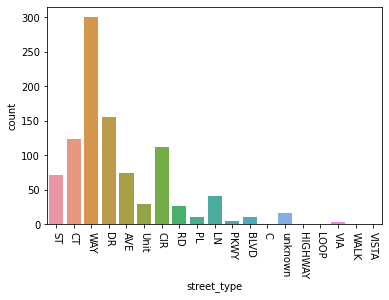

In [28]:
sns.countplot(x=data['street_type'])
plt.xticks(x=data['street_type'], rotation=-90)
plt.show()

## 7. Identifying Potential Dependent Variables

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   street       985 non-null    object  
 1   city         985 non-null    category
 2   zip          985 non-null    category
 3   state        985 non-null    category
 4   beds         985 non-null    category
 5   baths        985 non-null    category
 6   sq__ft       985 non-null    int64   
 7   type         985 non-null    object  
 8   sale_date    985 non-null    object  
 9   price        985 non-null    int64   
 10  latitude     985 non-null    float64 
 11  longitude    985 non-null    float64 
 12  empty_lot    985 non-null    bool    
 13  street_type  985 non-null    object  
dtypes: bool(1), category(5), float64(2), int64(2), object(4)
memory usage: 72.1+ KB


#### This dataset can be used for regression and classification. Regression will use the int64 and float values and the classifcation variables that can be used are the values within the category values

#### After looking at the dataset price would make a good dependent variable for a regression problem.

#### After looking at the dataset beds would make a good dependent variable for a classification problem.

## 8. Save the Cleaned Data Set

In [30]:
data.to_csv("UpdatedAndCleanedSacramentorealestatetransactions.csv", index=False)

## Conclusion

#### After finishing working with the dataset we can see that some of the features within this dataset are good and bad. Some of the same things we did in machine learning was to classify if a variable is a good feature and some of these are but some of them aren't. We also changed some to a different type like category, created a extra column like street_type and empty_lot to see what certain types of streets mean and what is the sq ft of 0 mean.